In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import linear_model
from sklearn.feature_selection import RFE

logistic_regression = linear_model.LogisticRegression()

### Load data files

In [405]:
waves = pd.read_csv('../binary/Wavelength.csv', header=None)
x = pd.read_csv('../binary/X.csv', header=None)
y = pd.read_csv('../binary/y.csv', header=None)

### Set up plot parameters

In [406]:
def plot_parameters(x, y):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = x
    fig_size[1] = y
    plt.rcParams["figure.figsize"] = fig_size

plot_parameters(30, 10)

### Drop records with NaN values if any exists

In [407]:
# Drop all rows that have NaN values
def drop_nan(waves, x, y):
    waves.dropna()
    x.dropna()
    y.dropna()
    
drop_nan(waves, x, y)

### Split data into training and testing sets 

In [408]:
flat_waves = waves.T.as_matrix(columns=None).flatten()
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.size, y_train.size)
print(x_test.size, y_test.size)

116046 126
49734 54


In [409]:
y_train = y_train.as_matrix(columns=None)

### Inspect traning set features

In [410]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,911,912,913,914,915,916,917,918,919,920
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,...,126.000000,126.000000,126.00000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,-6.646746,26.336508,-40.334841,30.549048,19.946905,-27.462460,-1.222222,16.737540,-0.666984,20.795873,...,16.597381,0.322143,6.78754,-10.929286,6.338889,-17.833968,2.711905,-1.796984,7.361349,27.376667
std,28.740734,35.769635,37.629418,16.458047,19.041829,25.237236,28.974084,24.505074,25.290307,20.113689,...,24.279817,27.571028,32.84572,34.418216,36.716800,43.571105,34.194138,30.923734,24.216778,20.634515
min,-74.140000,-72.440000,-143.410000,-13.050000,-25.910000,-84.620000,-72.790000,-52.840000,-79.430000,-39.760000,...,-25.340000,-43.220000,-49.64000,-70.100000,-64.090000,-92.670000,-59.460000,-55.220000,-37.350000,-12.100000
25%,-23.860000,1.965000,-65.705000,18.202500,7.012500,-42.772500,-19.975000,2.395000,-16.545000,7.222500,...,-4.852500,-24.190000,-23.30000,-43.837500,-26.857500,-59.717500,-28.617500,-31.075000,-14.062500,8.320000
50%,-8.725000,31.260000,-35.705000,30.420000,19.375000,-26.825000,-1.640000,17.490000,0.990000,19.590000,...,15.570000,-5.640000,5.50500,-10.635000,4.350000,-18.570000,-0.760000,-0.785000,8.120000,29.505000
75%,11.837500,53.922500,-15.332500,42.457500,31.752500,-7.547500,20.707500,34.397500,14.982500,33.297500,...,37.635000,26.450000,39.20000,21.675000,42.205000,20.615000,32.457500,26.572500,29.765000,45.560000
max,71.960000,102.370000,48.300000,70.290000,65.780000,47.220000,64.810000,59.630000,71.910000,73.880000,...,63.680000,48.820000,66.17000,57.770000,71.210000,56.550000,68.440000,62.360000,44.850000,65.770000


### Plot all features

In [411]:
def plot_features(x_train, y_train):
    index = 0
    for ind, row in x_train.iterrows():
        if y_train[index] == 1:
            plt.plot(x_train.columns.values, row, color="indianred")
        else:
            plt.plot(x_train.columns.values, row, color="lightgreen")
        index += 1

    plt.xlabel("Feature index", fontdict=None, labelpad=None, fontsize=12)
    plt.ylabel("Optical reflectance intensity", fontdict=None, labelpad=None, fontsize=12)
    plt.yticks([-150, -100, -50, 0, 50, 100, 150], fontsize=12)  
    plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900], fontsize=12)  
    plt.xlim(xmin=0, xmax=921)

#     plt.axvspan(650, 650, color='grey', alpha=0.5)

    plt.show()

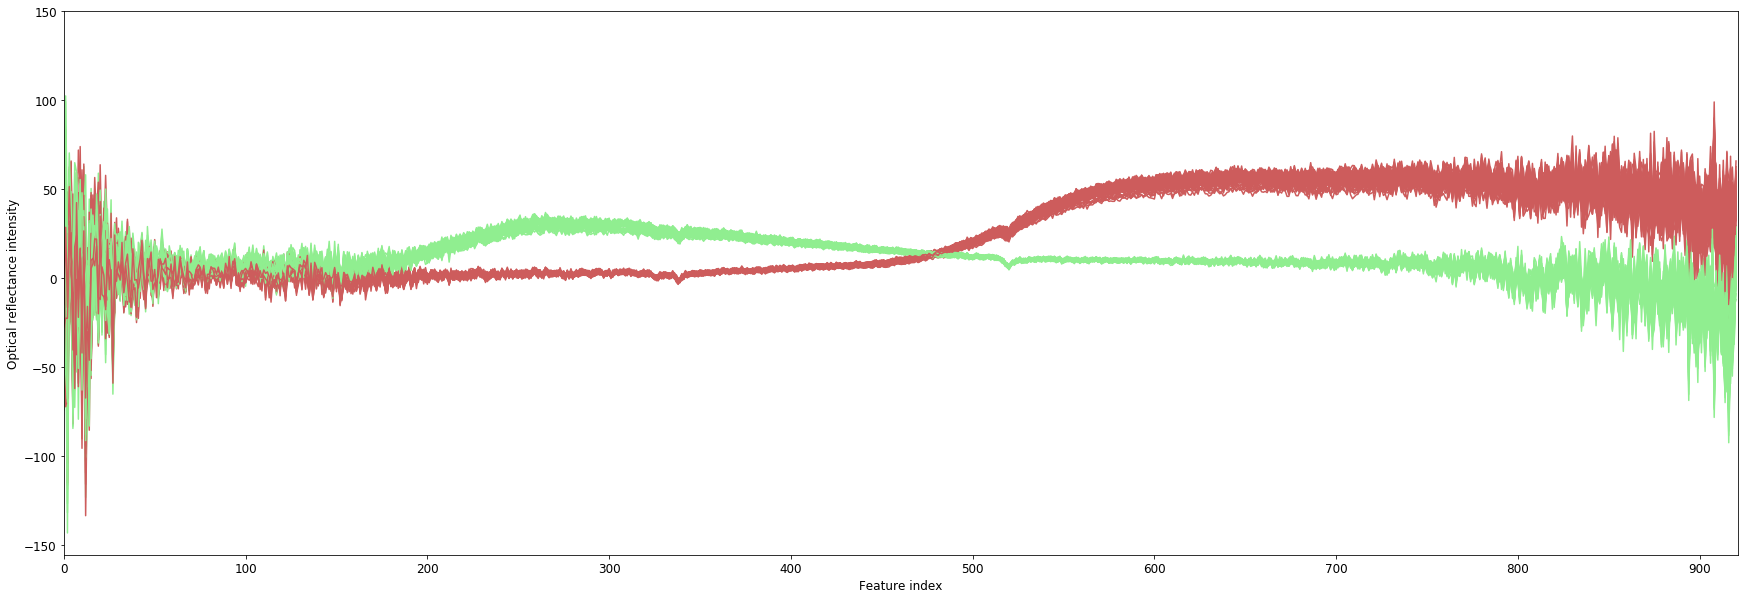

In [412]:
plot_features(x_train, y_train)

In [413]:
# def get_true_indices(matrix):
#     indices = []
#     index = 0
#     for i in matrix:
#         if i == True:
#             indices.append(index)
#         index += 1
#     return indices

### One feature experiment
It trains on a single feature using logistic regression model and plots accuracy. In return, this indicates which single features have
best accuracy and thus should be chosen. 

In [414]:
def one_feature_experiment(x_train, y_train):
    accuracies = []
    
    for i in x_train:
        x_one = x_train[i].values.reshape(-1, 1)
        logistic_regression.fit(x_one, y_train.ravel())
        y_res = logistic_regression.predict(x_one)
        accuracies.append(accuracy_score(y_train, y_res))

    return accuracies

In [415]:
def plot_one_feature_exp_results(acc):
    plot_parameters(30, 10)
    plt.xlabel("Feature index", fontdict=None, labelpad=None, fontsize=12)
    plt.ylabel("Accuracy", fontdict=None, labelpad=None, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900], fontsize=12)  
    plt.xlim(xmin=0, xmax=921)
    
    index = 0
    for i in acc:
        if i == 1:
            plt.axvspan(index, index+1, color='pink', alpha=0.8)
        elif i > 0.9:
            plt.axvspan(index, index, color='pink', alpha=0.6)
        elif i > 0.8:
            plt.axvspan(index, index, color='pink', alpha=0.4)
        elif i > 0.7:
            plt.axvspan(index, index, color='pink', alpha=0.2)
        elif i > 0.6:
            plt.axvspan(index, index, color='pink', alpha=0.1)
        elif i > 0.5:
            plt.axvspan(index, index, color='pink', alpha=0.05)

        index += 1
        
    plt.plot(acc)

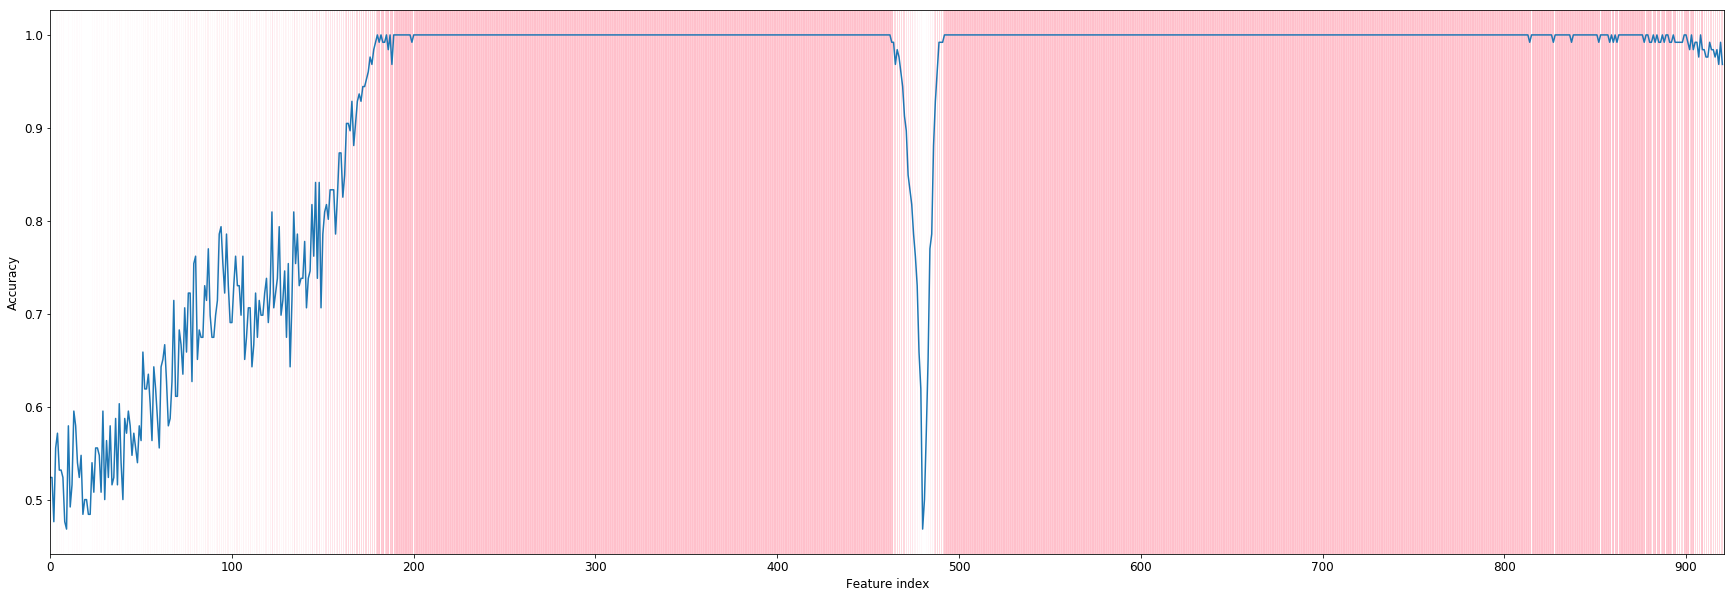

In [416]:
acc = one_feature_experiment(x_train, y_train)
plot_one_feature_exp_results(acc)

### Further feature investigation

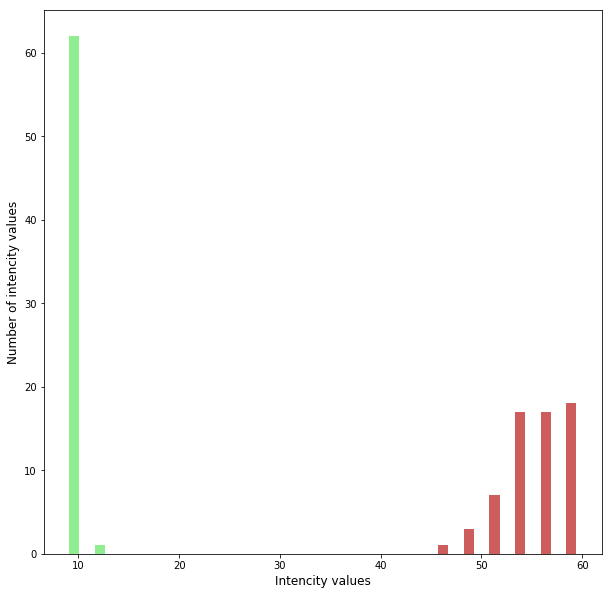

In [419]:
plot_parameters(10, 10)
green = []
red = []

index = 0
for i in x_train[620]:
    if y_train[index] == 1:
        red.append(i)
    else:
        green.append(i)
    index += 1
    
plt.xlabel("Intencity values", fontdict=None, labelpad=None, fontsize=12)
plt.ylabel("Number of intencity values", fontdict=None, labelpad=None, fontsize=12)
plt.hist([green, red], 20, alpha=1, color=["lightgreen", "indianred"])
plt.show()

### Single 629 feature experiment on training data

In [422]:
x_train_one_feature = x_train[629]
x_train_one_feature = x_train_one_feature.values.reshape(-1, 1)
logistic_regression.fit(x_train_one_feature, y_train.ravel())

y_res = logistic_regression.predict(x_train_one_feature)
print(accuracy_score(y_train, y_res))
print(classification_report(y_train, y_res))

1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        63
          1       1.00      1.00      1.00        63

avg / total       1.00      1.00      1.00       126



### Plots confussion matrix for 629 results

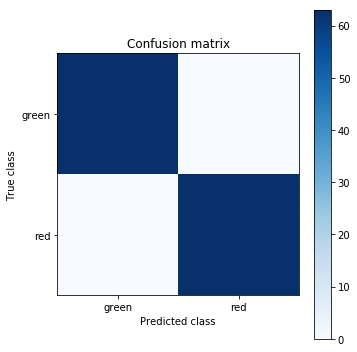

In [436]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks([0, 1], ["green", "red"])
    plt.yticks([0, 1], ["green", "red"])
    plt.tight_layout()
    plt.ylabel('True class')
    plt.xlabel('Predicted class')

plot_parameters(5, 5)
cm = confusion_matrix(y_train, y_res)
np.set_printoptions(precision=1)
plot_confusion_matrix(cm)

### Testing with four different features on test data - used in report

In [438]:
def experiment_different_features(x_test, y_test, x_train, y_train, feature_indexes):
    accuracies = []
    
    for i in feature_indexes:
        # train on training set 
        x_one = x_train[i].values.reshape(-1, 1)
        logistic_regression.fit(x_one, y_train)
        
        # predict on testing set         
        x_one_test = x_test[i].values.reshape(-1, 1)
        y_res = logistic_regression.predict(x_one_test)
        accuracies.append({i: accuracy_score(y_test, y_res)})

    return accuracies

In [439]:
accuracies = experiment_different_features(x_test, y_test, x_train, y_train, [300, 400, 600, 700])
accuracies

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'DataFrame' object has no attribute 'ravel'

### Final results

In [437]:
# train on training set
x_400 = x_train[400].values.reshape(-1, 1)
final_model = logistic_regression.fit(x_400, y_train.ravel())

to_clasify = pd.read_csv('../binary/XToClassify.csv', header=None)
to_clasify = to_clasify[400]
x_to_clasify_one = to_clasify.values.reshape(-1, 1)
y_final_res = final_model.predict(x_to_clasify_one)

print(y_final_res)
def write_to_file(df, path):
    df.to_csv(path, encoding='utf-8', index=False)

write_to_file(pd.DataFrame([y_final_res]), "../binaryTask/PredictedClasses.csv")

[1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0]
